In [1]:
from sync import sync
sync('/moj.ladisk.si/mojladisksi.py')
from mojladisksi import poslji
import numpy as np


# DER

Kovšca Dejan, 23160187, dejan.kovsca@gmail.com

Pričetek reševanja: Fri Jan 05 16:54:27 UTC 2018

Na nosilec dolžine $l$ z elastičnim modulom $E$ in vztrajnostnim momentom prereza $I$ deluje kontinuirna obremenitev $q(x) = q_0\,(1-\frac{x^2}{l^2})$ in osna sila $N$. Nosilec diskretiziramo z $n$ ekvidistančno razporejenimi točkami na območju $x\in[0,\,l]$. Diferencialna enačba upogiba $w(x)$ je: $$-\frac{\mathrm{d}^4 w(x)}{\mathrm{d}x^4} + \frac{N}{EI}\frac{\mathrm{d}^2 w(x)}{\mathrm{d}x^2}=-\frac{q(x)}{EI}$$Robni pogoji so: $w(0)=w(l)=0$ in $w''(0)=w''(l)=0$. 

<img width=500 src='dejan.kovsca_DER_Fri Jan 05 16-54-27 UTC 2018.jpg'>

In [2]:
E = 200000000000 # N/m$^2$
I = 6.3E-9 # m^4
l = 0.7 # m
n = 800 # 
N = 1300 # N
q_0 = 1000 # N/m

### 1. vprašanje

 Navadne diferencialne enačbe so sestavljene iz funkcije z eno spremenljivko in iz njenih odvodov (1: Da, 2: Ne).

Število poskusov: 1, enote:  /

In [2]:
odgovor1 = 1#?

In [3]:
poslji(odgovor1, id=555211479512973312, st=0)

Pravilna rešitev. Uspeh: 16%. Preostali čas: 6dni,12ur, 14min


### 2. vprašanje

 Določite vektor $x$.

Število poskusov: 3, enote:  m

In [3]:
x = np.linspace(0, l, n)

In [8]:
odgovor2 = x#?

In [9]:
poslji(odgovor2, id=355211479512973312, st=1)

Pravilna rešitev. Uspeh: 33%. Preostali čas: 6dni,12ur, 14min


### 3. vprašanje

 Diferencialno enačbo pretvorite na sistem diferencialnih enačb prvega reda in podajte vektor vrednosti prvega, drugega, tretjega in četrtega odvoda (v obliki numeričnega polja) pri začetnem pogoju $\textbf{w}_0(x=0) = [0, -0.1, 0, 100]$.

Število poskusov: 3.

In [4]:
from scipy.integrate import odeint

$q(x) = q_0\,(1-\frac{x^2}{l^2})$

$-\frac{\mathrm{d}^4 w(x)}{\mathrm{d}x^4} + \frac{N}{EI}\frac{\mathrm{d}^2 w(x)}{\mathrm{d}x^2}=-\frac{q(x)}{EI}$

Robni pogoji so: $w(0)=w(l)=0$ in $w''(0)=w''(l)=0$.

y0 = w

y1 = w'

y2 = w''

y3 = w'''

y0' = y1

y1' = y2

y2' = y3

y3' = (N/E*I)*w''(x) + q(x)/EI

In [5]:
def q_porazdeljena(x, q_0=1000, l=0.7):
    return q_0 * (1 - x**2/(l**2))

In [6]:
def f_desne_strani(y, x, N=1300, E=200000000000, I=6.3e-9):
    return np.array([y[1], y[2], y[3], ((N/(E*I))*y[2] + q_porazdeljena(x)/(E*I))])

In [7]:
w0 = [0, -0.1, 0, 100] # začetni pogoji

In [18]:
odgovor3 = f_desne_strani(w0, 0)#?
odgovor3

array([  -0.1       ,    0.        ,  100.        ,    0.79365079])

In [16]:
poslji(odgovor3, id=655211479512973312, st=2)

Pravilna rešitev. Uspeh: 100%. Preostali čas: 1dni,10ur, 49min


### 4. vprašanje

 Z uporabo strelske metode določite vektor nepoznanih začetnih pogojev pri $x=0$. Pomagajte si z vgrajenima funkcijama `scipy.integrate.odeint` in `scipy.optimize.root`. Za začetno ugibanje privzemite začetni pogoj $\textbf{w}_0(x=0) = [0, -0.1, 0, 100]$.

Število poskusov: 3.

In [33]:
def r_nosilec(y0=[-0.1, 100], x=None, ciljne_vrednosti=np.array([0, 0]), N=1300, E=200000000000, I=6.3e-9):
    w_ode = odeint(f_desne_strani, y0=[0, y0[0], 0, y0[1]], t=x, args=(N, E, I))
    r = w_ode[-1,0:3:2] - ciljne_vrednosti
    return r

In [34]:
r_nosilec(y0=[0, 0], x=x)

array([ 0.00754068,  0.16981712])

In [35]:
from scipy.optimize import root

In [36]:
rešitev = root(r_nosilec, np.array([0., 0.]), args=(x))
rešitev.x

array([ 0.0079303 , -0.22329944])

In [39]:
odgovor4 = rešitev.x#?
odgovor4

array([ 0.0079303 , -0.22329944])

In [40]:
poslji(odgovor4, id=755211479512973312, st=3)

Pravilna rešitev. Uspeh: 50%. Preostali čas: 3dni,14ur, 29min


### 5. vprašanje

 S pomočjo izračunanih začetnih pogojev, določite numerično polje upogibov $w(x)$, pri čemer je $x$ definiran z $n$ točkami na območj $x\in[0,\,l]$.

Število poskusov: 3, enote:  m

In [41]:
y = odeint(f_desne_strani, np.array([0, rešitev.x[0], 0, rešitev.x[1]]), x, args=(N, E, I))
y

array([[  0.00000000e+00,   7.93030444e-03,   0.00000000e+00,
         -2.23299443e-01],
       [  6.94765527e-06,   7.93021890e-03,  -1.95327019e-04,
         -2.22604218e-01],
       [  1.38951636e-05,   7.92996250e-03,  -3.90045031e-04,
         -2.21909172e-01],
       ..., 
       [  1.25855902e-05,  -7.18282470e-03,  -2.30372580e-04,
          1.31474554e-01],
       [  6.29283763e-06,  -7.18297602e-03,  -1.15187008e-04,
          1.31477006e-01],
       [ -1.69677640e-17,  -7.18302644e-03,   6.93889390e-18,
          1.31477824e-01]])

In [46]:
import matplotlib.pyplot as plt

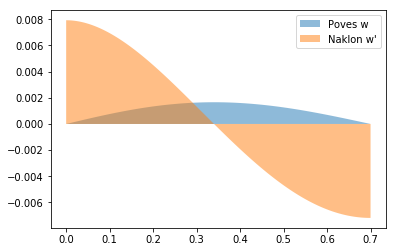

In [65]:
plt.fill_between(x, y[:, 0], label='Poves w', alpha=0.5)
plt.fill_between(x, y[:, 1], label='Naklon w\'', alpha=0.5)
plt.legend()
plt.show()

In [49]:
odgovor5 = y[:, 0]#?

In [50]:
poslji(odgovor5, id=255211479512973312, st=4)

Pravilna rešitev. Uspeh: 66%. Preostali čas: 3dni,14ur, 15min


### 6. vprašanje

 Določite numerično polje vrednosti četrtega odvoda $w''''(x)$, pri čemer je $x$ definiran z $n$ točkami na območj $x\in[0,\,l]$.

Število poskusov: 3.

In [54]:
cetrti_odvod = N/(E*I) * y[:, 2] + q_porazdeljena(x)/(E*I)

In [56]:
odgovor6 = cetrti_odvod#?
odgovor6[:10]

array([ 0.79365079,  0.79344802,  0.79324339,  0.79303691,  0.79282856,
        0.79261836,  0.79240629,  0.79219237,  0.79197659,  0.79175895])

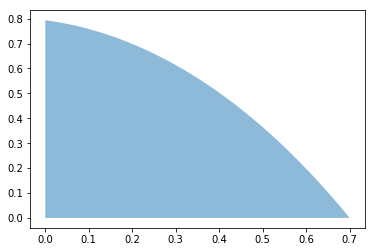

In [63]:
plt.fill_between(x, cetrti_odvod, alpha=0.5)
plt.show()

In [62]:
poslji(odgovor6, id=555211479512973312, st=5)

Pravilna rešitev. Uspeh: 83%. Preostali čas: 3dni,14ur, 10min
